In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/feynn_dataset_1/dataset9000.csv")
df.head()

,Database Fundamentals,Computer Architecture,Distributed Computing Systems,Cyber Security,Networking,Software Development,Programming Skills,Project Management,Computer Forensics Fundamentals,Technical Communication,AI ML,Software Engineering,Business Analysis,Communication skills,Data Science,Troubleshooting skills,Graphics Designing,Role
0,Professional,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Database Administrator
1,Professional,Poor,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Database Administrator
2,Professional,Beginner,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Database Administrator
3,Professional,Average,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Database Administrator
4,Professional,Intermediate,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Database Administrator


In [ ]:

df.fillna(method='ffill')

,Database Fundamentals,Computer Architecture,Distributed Computing Systems,Cyber Security,Networking,Software Development,Programming Skills,Project Management,Computer Forensics Fundamentals,Technical Communication,AI ML,Software Engineering,Business Analysis,Communication skills,Data Science,Troubleshooting skills,Graphics Designing,Role
0,Professional,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Database Administrator
1,Professional,Poor,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Database Administrator
2,Professional,Beginner,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Database Administrator
3,Professional,Average,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Database Administrator
4,Professional,Intermediate,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Database Administrator
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9174,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Poor,Poor,Professional,Graphics Designer
9175,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Beginner,Beginner,Professional,Graphics Designer
9176,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Average,Average,Professional,Graphics Designer
9177,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Intermediate,Intermediate,Professional,Graphics Designer


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9179 entries, 0 to 9178
Data columns (total 18 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Database Fundamentals            9179 non-null   object
 1   Computer Architecture            9179 non-null   object
 2   Distributed Computing Systems    9179 non-null   object
 3   Cyber Security                   9179 non-null   object
 4   Networking                       9179 non-null   object
 5   Software Development             9179 non-null   object
 6   Programming Skills               9179 non-null   object
 7   Project Management               9179 non-null   object
 8   Computer Forensics Fundamentals  9179 non-null   object
 9   Technical Communication          9179 non-null   object
 10  AI ML                            9179 non-null   object
 11  Software Engineering             9179 non-null   object
 12  Business Analysis                9

In [ ]:
df.isnull().sum()

Database Fundamentals              0
Computer Architecture              0
Distributed Computing Systems      0
Cyber Security                     0
Networking                         0
Software Development               0
Programming Skills                 0
Project Management                 0
Computer Forensics Fundamentals    0
Technical Communication            0
AI ML                              0
Software Engineering               0
Business Analysis                  0
Communication skills               0
Data Science                       0
Troubleshooting skills             0
Graphics Designing                 1
Role                               0
dtype: int64

In [ ]:
df.dtypes

Database Fundamentals              object
Computer Architecture              object
Distributed Computing Systems      object
Cyber Security                     object
Networking                         object
Software Development               object
Programming Skills                 object
Project Management                 object
Computer Forensics Fundamentals    object
Technical Communication            object
AI ML                              object
Software Engineering               object
Business Analysis                  object
Communication skills               object
Data Science                       object
Troubleshooting skills             object
Graphics Designing                 object
Role                               object
dtype: object

In [ ]:
df.corr

<bound method DataFrame.corr of      Database Fundamentals Computer Architecture  \
0             Professional        Not Interested   
1             Professional                  Poor   
2             Professional              Beginner   
3             Professional               Average   
4             Professional          Intermediate   
...                    ...                   ...   
9174        Not Interested        Not Interested   
9175        Not Interested        Not Interested   
9176        Not Interested        Not Interested   
9177        Not Interested        Not Interested   
9178        Not Interested        Not Interested   

     Distributed Computing Systems  Cyber Security      Networking  \
0                   Not Interested  Not Interested  Not Interested   
1                   Not Interested  Not Interested  Not Interested   
2                   Not Interested  Not Interested  Not Interested   
3                   Not Interested  Not Interested  Not Interes

<Axes: xlabel='Role', ylabel='count'>

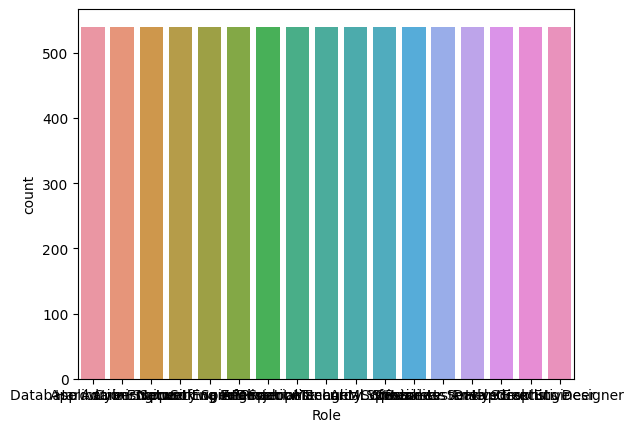

In [ ]:


sns.countplot(x="Role",data=df)


In [ ]:
df = df[[ 'Database Fundamentals', 'Computer Architecture',  'Distributed Computing Systems','Cyber Security','Networking','Software Development','Programming Skills','Project Management','Computer Forensics Fundamentals','Technical Communication','AI ML','Software Engineering','Business Analysis','Communication skills','Data Science','Troubleshooting skills','Graphics Designing','Role']]

df.head()

,Database Fundamentals,Computer Architecture,Distributed Computing Systems,Cyber Security,Networking,Software Development,Programming Skills,Project Management,Computer Forensics Fundamentals,Technical Communication,AI ML,Software Engineering,Business Analysis,Communication skills,Data Science,Troubleshooting skills,Graphics Designing,Role
0,Professional,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Database Administrator
1,Professional,Poor,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Database Administrator
2,Professional,Beginner,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Database Administrator
3,Professional,Average,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Database Administrator
4,Professional,Intermediate,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Not Interested,Database Administrator


In [ ]:
X = np.asarray(df[['Database Fundamentals', 'Computer Architecture',  'Distributed Computing Systems','Cyber Security','Networking','Software Development','Programming Skills','Project Management','Computer Forensics Fundamentals','Technical Communication','AI ML','Software Engineering','Business Analysis']])
X[0:6]

y = np.asarray(df['Role'])
y [0:6]

In [ ]:
from sklearn.preprocessing import LabelEncoder 
y = LabelEncoder().fit_transform(y)

In [ ]:
y [0:6]

array([7, 7, 7, 7, 7, 7])

In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder 
X = OneHotEncoder().fit_transform(X).toarray()
X[0:6]


array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        1., 0., 0., 0., 0., 0.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (6425, 91) (6425,)
Test set: (2754, 91) (2754,)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR =LogisticRegression().fit(X_train,y_train)
LR

In [ ]:
y_pred = LR.predict(X_test)
y_pred

In [ ]:
score = LR.score(X_test, y_test)
print('Test Accuracy Score', score)

Test Accuracy Score 0.8013798111837328


In [ ]:
print('Precision: %.3f' % precision_score(y_test, y_pred,average='micro'))
	
print('Recall: %.3f' % recall_score(y_test, y_pred,average='micro'))

	
print('F1 Score: %.3f' % f1_score(y_test, y_pred,average='micro'))

Precision: 0.801
Recall: 0.801
F1 Score: 0.801


In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf_model = DecisionTreeClassifier(criterion="gini", random_state=100, max_depth=6, min_samples_leaf=2)   
clf_model.fit(X_train,y_train)

In [ ]:
y_predict = clf_model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
print("Accuracy : ", accuracy_score(y_test,y_predict))


Accuracy :  0.3954248366013072


In [ ]:
print('Precision: %.3f' % precision_score(y_test, y_predict,average='micro'))
	
print('Recall: %.3f' % recall_score(y_test, y_predict,average='micro'))

	
print('F1 Score: %.3f' % f1_score(y_test, y_predict,average='micro'))

Precision: 0.395
Recall: 0.395
F1 Score: 0.395


In [ ]:
from sklearn.svm import SVC
svm_model=SVC()
svm_model.fit(X_train,y_train)
y_predict=svm_model.predict(X_test)
svm_model.score(X_test,y_test)


0.8159041394335512

In [ ]:
print('Precision: %.3f' % precision_score(y_test, y_predict,average='micro'))
	
print('Recall: %.3f' % recall_score(y_test, y_predict,average='micro'))

	
print('F1 Score: %.3f' % f1_score(y_test, y_predict,average='micro'))

Precision: 0.816
Recall: 0.816
F1 Score: 0.816


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc_model=RandomForestClassifier()
rfc_model.fit(X_train,y_train)
y_predict=rfc_model.predict(X_test)
rfc_model.score(X_test,y_test)

0.7781408859840232

In [ ]:
print('Precision: %.3f' % precision_score(y_test, y_predict,average='micro'))
	
print('Recall: %.3f' % recall_score(y_test, y_predict,average='micro'))

	
print('F1 Score: %.3f' % f1_score(y_test, y_predict,average='micro'))

Precision: 0.778
Recall: 0.778
F1 Score: 0.778


In [ ]:
from xgboost import XGBClassifier
m4=XGBClassifier()
m4.fit(X_train,y_train)
y_predict=m4.predict(X_test)
m4.score(X_test,y_test)

0.7781408859840232

In [ ]:
print('Precision: %.3f' % precision_score(y_test, y_predict,average='micro'))
	
print('Recall: %.3f' % recall_score(y_test, y_predict,average='micro'))

	
print('F1 Score: %.3f' % f1_score(y_test, y_predict,average='micro'))

Precision: 0.778
Recall: 0.778
F1 Score: 0.778
